<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion/blob/main/DecisionTree_Clasificacion_2D_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de Decisión (Decision Tree)
Este notebook implementa un árbol de decisión para clasificación binaria con visualización 2D, 3D y estructura del árbol.

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Crear datos simulados
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de árbol de decisión
modelo_dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
modelo_dt.fit(X_train, y_train)

# Evaluación
print("Precisión DT:", accuracy_score(y_test, modelo_dt.predict(X_test)))


Precisión DT: 0.9666666666666667


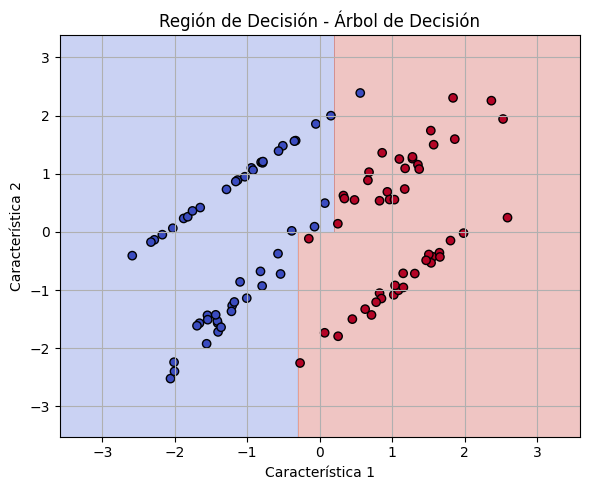

In [3]:
# Visualización de regiones de decisión 2D
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = modelo_dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Región de Decisión - Árbol de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.tight_layout()
plt.show()


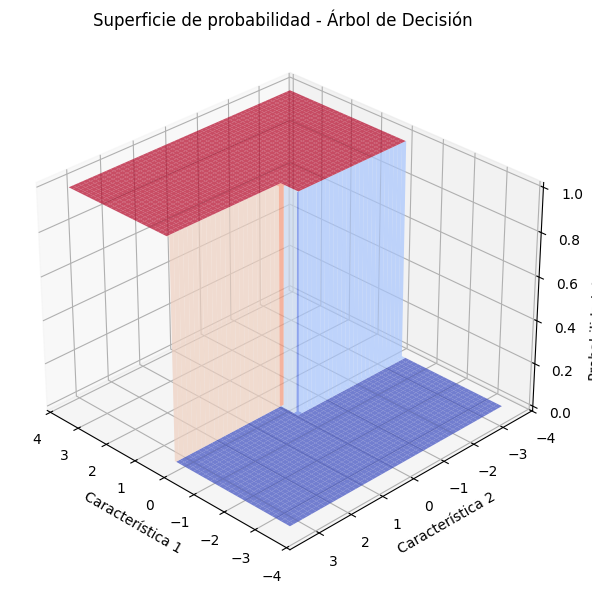

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Visualización 3D con la probabilidad de clase 1
Z_3d = modelo_dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_3d = Z_3d.reshape(xx.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z_3d, cmap=cm.coolwarm, edgecolor='none', alpha=0.7)
ax.set_title("Superficie de probabilidad - Árbol de Decisión")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")
ax.set_zlabel("Probabilidad de clase 1")
ax.view_init(elev=30, azim=135)
plt.tight_layout()
plt.show()


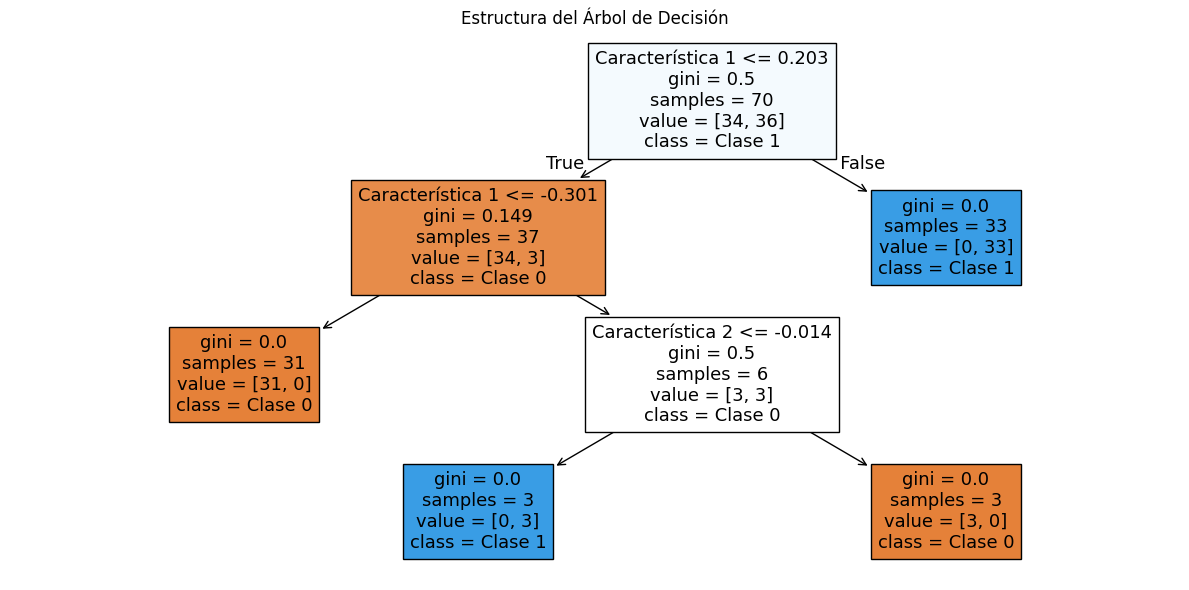

In [5]:
# Visualización de la estructura del árbol
plt.figure(figsize=(12, 6))
plot_tree(modelo_dt, filled=True, feature_names=["Característica 1", "Característica 2"], class_names=["Clase 0", "Clase 1"])
plt.title("Estructura del Árbol de Decisión")
plt.tight_layout()
plt.show()


### ✅ Conclusiones sobre Árboles de Decisión

- Los árboles son modelos **altamente interpretables** y visualmente explicables.
- La profundidad máxima controla el **nivel de complejidad** del modelo, y una buena práctica es aplicar **poda**.
- La visualización 2D muestra cómo los árboles dividen el espacio de forma ortogonal.
- La superficie 3D refleja la **probabilidad de pertenencia** a una clase según las características.
- El gráfico del árbol facilita comunicar la lógica de decisión incluso a personas no técnicas.
